In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random

# Taking Input

In [2]:
colorPicture=cv2.imread("pic.jpg")

# Converting to grayscale

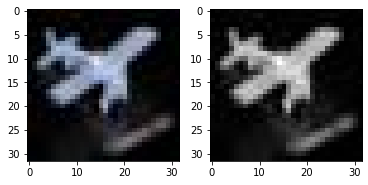

In [3]:
grayPicture=np.array(cv2.cvtColor(colorPicture,cv2.COLOR_RGB2GRAY))
plt.subplot(1,2,1)
plt.imshow(colorPicture)
plt.subplot(1,2,2)
plt.imshow(grayPicture,cmap="gray")

# Setting Filters

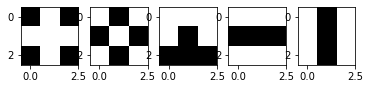

In [6]:
filter1=np.array([
    [-255,255,-255],
    [255,255,255],
    [-255,255,-255],
])

filter2=np.array([
    [255,-255,255],
    [-255,255,-255],
    [255,-255,255],
])

filter3=np.array([
    [255,255,255],
    [255,-255,255],
    [-255,-255,-255],
])

filter4=np.array([
    [255,255,255],
    [-255,-255,-255],
    [255,255,255],
])

filter5=np.array([
    [255,-255,255],
    [255,-255,255],
    [255,-255,255],
])


filterList=[filter1,filter2,filter3,filter4,filter5]
for a in range(len(filterList)):
    plt.subplot(1,len(filterList),a+1)
    plt.imshow(filterList[a],cmap="gray")

# Using Convolution

In [6]:
np.array([grayPicture[0][0:3],grayPicture[1][0:3],grayPicture[2][0:3]])

array([[ 0,  6,  1],
       [ 0,  0,  1],
       [10,  0,  9]], dtype=uint8)

In [7]:
activationMaps=list()
for filterr in filterList:
    
    #Applying Convolution
    activationMap=list()
    dimension=grayPicture.shape
    for b in range(dimension[1]-2):
        rowList=list()
        for n in range(dimension[1]-2):
            conv=np.array([grayPicture[b][n:n+3],grayPicture[b+1][n:n+3],grayPicture[b+2][n:n+3]])
            rowList.append(np.sum(np.multiply(conv,filterr)))
        activationMap.append(rowList)
    
    #APPLYING RELU
    #for a in range(30):
        #for b in range(30):
            #if activationMap[a][b]<0:
                #activationMap[a][b]=0
    
    activationMaps.append(activationMap)

# Activation Map

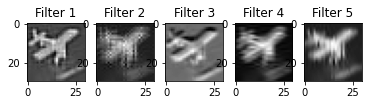

In [8]:
for a in range(len(activationMaps)):
    plt.subplot(1,len(activationMaps),a+1)
    plt.title("Filter "+str(a+1))
    plt.imshow(activationMaps[a],cmap="gray")

# Stacking and ReLu

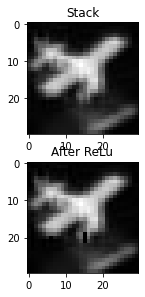

In [10]:
#Stacking
stack=np.array(activationMaps[0])
counter=1
while counter<len(activationMaps):
    stack=np.add(stack,activationMaps[counter])
    counter+=1
stack=np.divide(stack,len(activationMaps))


plt.subplot(2,1,1)
plt.title("Stack")
plt.imshow(stack,cmap="gray")
plt.tight_layout()

#APPLYING RELU
for a in range(30):
        for b in range(30):
            if activationMap[a][b]<0:
                stack[a][b]=0    
plt.subplot(2,1,2)
plt.title("After ReLu")
plt.imshow(stack,cmap="gray")

# Padding

In [11]:
padded=np.zeros([32,32])
counterRow=1
counterColumn=1
while counterRow<31:
    counterColumn=1
    while counterColumn<31:
        padded[counterRow][counterColumn]=stack[counterRow-1][counterColumn-1]
        counterColumn+=1
    counterRow+=1
padded

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0., 1479., 1326., ...,  918., 1122.,    0.],
       [   0., 1173.,  510., ...,  255.,  561.,    0.],
       ...,
       [   0.,  510.,  867., ...,  918.,  612.,    0.],
       [   0.,  561.,  816., ...,  561.,  459.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

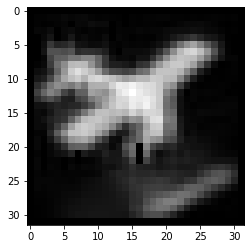

In [12]:
plt.imshow(padded,cmap="gray")

# POOLING

In [13]:
pool=np.array([padded[0][0:2],padded[1][0:2]])
print(pool)

[[   0.    0.]
 [   0. 1479.]]


In [14]:
np.max(pool)

1479.0

In [15]:
pictureNow=list()
for b in range(31):
    poolRowList=list()
    for a in range(31):
        pool=np.array([padded[b][a:a+2],padded[b+1][a:a+2]])
        poolRowList.append(np.max(pool))
    pictureNow.append(poolRowList)

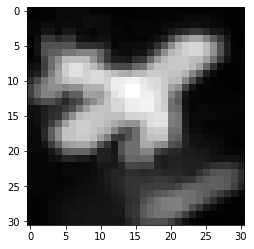

In [16]:
plt.imshow(pictureNow,cmap="gray")

# USING CONVOLUTION TWO TIMES

In [18]:
grayPicture=np.array(cv2.cvtColor(colorPicture,cv2.COLOR_RGB2GRAY))
for count in range(1):
    activationMaps=list()
    dimension=grayPicture.shape
    
    
    #Applying Convolution
    for filterr in filterList:
        activationMap=list()
        dimension=grayPicture.shape
        for b in range(dimension[1]-2):
            rowList=list()
            for n in range(dimension[1]-2):
                conv=np.array([grayPicture[b][n:n+3],grayPicture[b+1][n:n+3],grayPicture[b+2][n:n+3]])
                rowList.append(np.sum(np.multiply(conv,filterr)))
            activationMap.append(rowList)
        activationMaps.append(activationMap)

    #Stacking    
    stack=np.array(activationMaps[0])
    counter=1
    while counter<len(activationMaps):
        stack=np.add(stack,activationMaps[counter])
        counter+=1

    #ReLu
    for a in range(dimension[1]-2):
        for b in range(dimension[1]-2):
            if activationMap[a][b]<0:
                stack[a][b]=0


    #PADDING
    grayPicture=np.zeros(dimension)
    counterRow=1
    counterColumn=1
    while counterRow<dimension[1]-1:
        counterColumn=1
        while counterColumn<dimension[1]-1:
            grayPicture[counterRow][counterColumn]=stack[counterRow-1][counterColumn-1]
            counterColumn+=1
        counterRow+=1


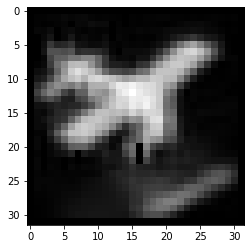

In [19]:
plt.imshow(grayPicture,cmap="gray")

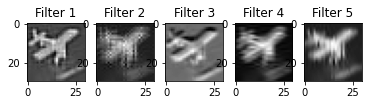

In [20]:
for a in range(len(activationMaps)):
    plt.subplot(1,len(activationMaps),a+1)
    plt.title("Filter "+str(a+1))
    plt.imshow(activationMaps[a],cmap="gray")

# USING CONVOLUTION MULTIPLE TIMES
<img src="flow.png">

In [21]:
grayPicture=np.array(cv2.cvtColor(colorPicture,cv2.COLOR_RGB2GRAY))
for count in range(3):
    activationMaps=list()
    dimension=grayPicture.shape
    
    
    #Applying Convolution
    for filterr in filterList:
        activationMap=list()
        dimension=grayPicture.shape
        for b in range(dimension[1]-2):
            rowList=list()
            for n in range(dimension[1]-2):
                conv=np.array([grayPicture[b][n:n+3],grayPicture[b+1][n:n+3],grayPicture[b+2][n:n+3]])
                rowList.append(np.sum(np.multiply(conv,filterr)))
            activationMap.append(rowList)
        activationMaps.append(activationMap)

    #Stacking    
    stack=np.array(activationMaps[0])
    counter=1
    while counter<len(activationMaps):
        stack=np.add(stack,activationMaps[counter])
        counter+=1

    #ReLu
    for a in range(dimension[1]-2):
        for b in range(dimension[1]-2):
            if activationMap[a][b]<0:
                stack[a][b]=0


    #PADDING
    grayPicture=np.zeros(dimension)
    counterRow=1
    counterColumn=1
    while counterRow<dimension[1]-1:
        counterColumn=1
        while counterColumn<dimension[1]-1:
            grayPicture[counterRow][counterColumn]=stack[counterRow-1][counterColumn-1]
            counterColumn+=1
        counterRow+=1
    
    #POOLING
    if count>=1:
        pictureNow=list()
        for b in range(dimension[1]-1):
            poolRowList=list()
            for a in range(dimension[1]-1):
                pool=np.array([grayPicture[b][a:a+2],grayPicture[b+1][a:a+2]])
                poolRowList.append(np.max(pool))
            pictureNow.append(poolRowList)
        grayPicture=np.array(pictureNow)


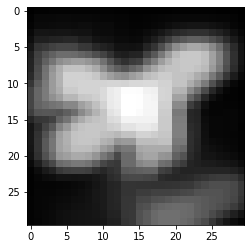

In [22]:
plt.imshow(grayPicture,cmap="gray")

# FILTERS AFTER 4TH LAYERS

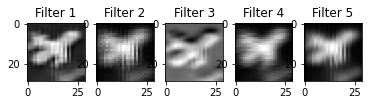

In [23]:
for a in range(len(activationMaps)):
    plt.subplot(1,len(activationMaps),a+1)
    plt.title("Filter "+str(a+1))
    plt.imshow(activationMaps[a],cmap="gray")